<a href="https://colab.research.google.com/github/Bharathkumar1011/Air-quality-index/blob/main/Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
pip install xgboost lightgbm catboost

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [45]:
cp = pd.read_csv('/content/data.csv')

In [46]:
cp.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [47]:
cp.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [48]:
cp.shape

(6819, 96)

In [49]:
cp.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [50]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [51]:
cp.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [52]:
x = cp.drop(columns='Bankrupt?') #feature
y = cp['Bankrupt?'] #op

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Modeling¶
We will evaluate the following regression models:

Decision Tree
Random Forest
Gradient Boosting
Support Vector Regression (SVR)
Ridge Regression
Lasso Regression
XGBoost
LightGBM
CatBoost


Model Evaluation¶
The performance of each model is evaluated using Mean Squared Error (MSE) and R-squared (R²). Below are the results and visualizations to compare the models.

In [54]:
# Function to evaluate a model
def evaluate_model(model, x_train, y_train, X_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


# Initialize the models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "Lasso Regression": Lasso(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": cb.CatBoostRegressor(verbose=0)
}

# Evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {"Mean Squared Error": mse, "R-squared": r2}

# Display the results
for name, metrics in results.items():
    print(f"{name} - Mean Squared Error: {metrics['Mean Squared Error']:.4f}, R-squared: {metrics['R-squared']:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] Start training from score 0.030981
Decision Tree - Mean Squared Error: 0.0543, R-squared: -0.5073
Random Forest - Mean Squared Error: 0.0255, R-squared: 0.2908
Gradient Boosting - Mean Squared Error: 0.0265, R-squared: 0.2645
Support Vector Regression - Mean Squared Error: 0.0395, R-squared: -0.0961
Lasso Regression - Mean Squared Error: 0.0360, R-squared: 0.0007
XGBoost - Mean Squared Error: 0.0266, R-squared: 0.2614
LightGBM - Mean Squared Error: 0.0252, R-squared: 0.2986
CatBoost - Mean Squared Error: 0.0246, R-squared: 0.3169


Decision Tree - Mean Squared Error: 0.0543, R-squared: -0.5073

---


Random Forest - Mean Squared Error: 0.0255, R-squared: 0.2908

---


Gradient Boosting - Mean Squared Error: 0.0265, R-squared: 0.2645

---


Support Vector Regression - Mean Squared Error: 0.0395, R-squared: -0.0961

---


Lasso Regression - Mean Squared Error: 0.0360, R-squared: 0.0007

---


XGBoost - Mean Squared Error: 0.0266, R-squared: 0.2614

---


LightGBM - Mean Squared Error: 0.0252, R-squared: 0.2986

---


CatBoost - Mean Squared Error: 0.0246, R-squared: 0.3169

<ipython-input-55-91361e274c18>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='viridis')


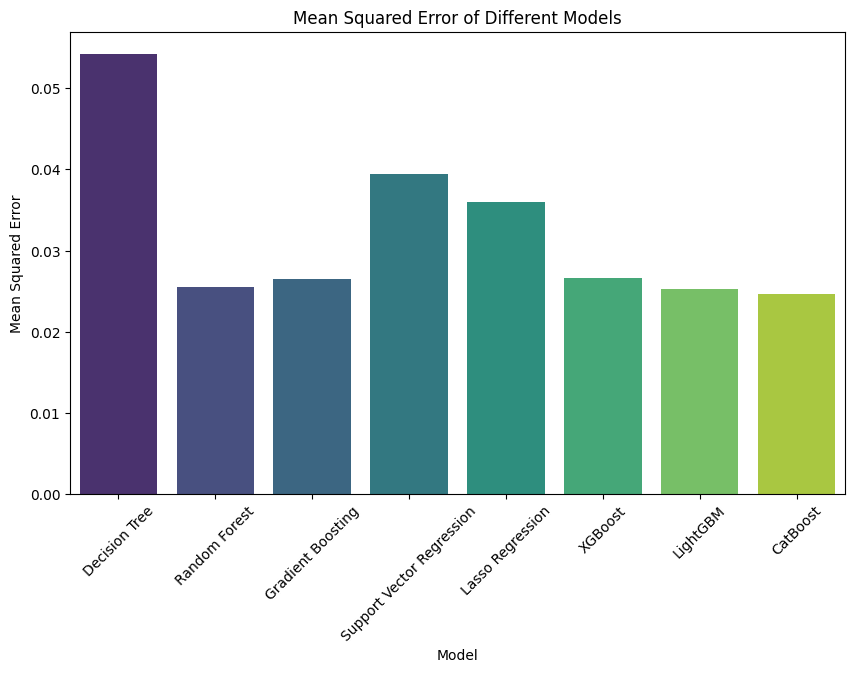

<ipython-input-55-91361e274c18>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='viridis')


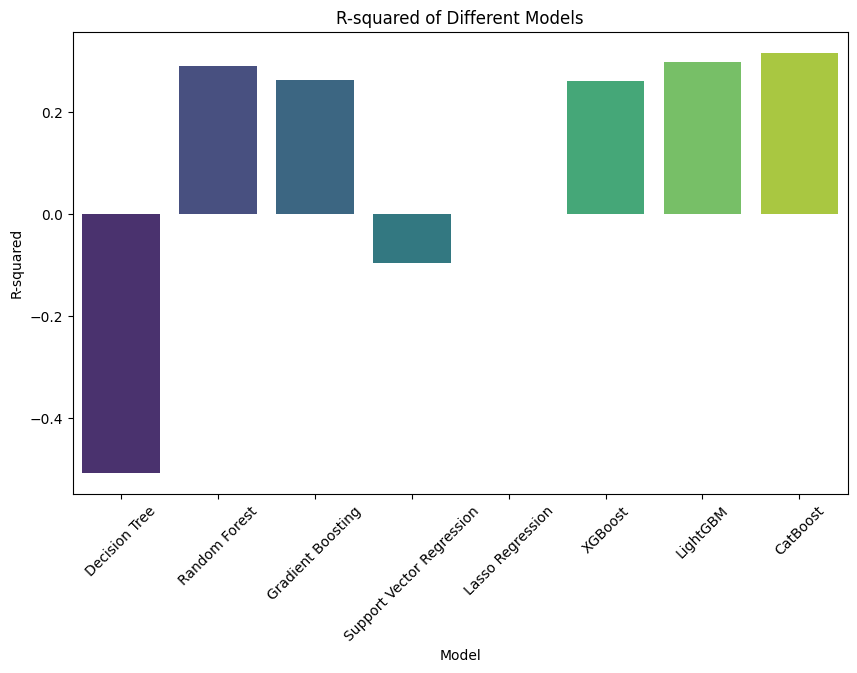

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
models = list(results.keys())
mse_values = [results[model]["Mean Squared Error"] for model in models]
r2_values = [results[model]["R-squared"] for model in models]

# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, palette='viridis')
plt.title('R-squared of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

HERE CATBOOST ALSO ONLY EXPLAINS 36% DEPENDENT VARIABLE BUT ITS BEST AMOUNG GIVEN MODELS THATS T S CHOOEN

Learning rate set to 0.053529
0:	learn: 0.1709532	total: 127ms	remaining: 2m 6s
1:	learn: 0.1688375	total: 202ms	remaining: 1m 40s
2:	learn: 0.1668902	total: 284ms	remaining: 1m 34s
3:	learn: 0.1651303	total: 378ms	remaining: 1m 34s
4:	learn: 0.1631405	total: 490ms	remaining: 1m 37s
5:	learn: 0.1615289	total: 595ms	remaining: 1m 38s
6:	learn: 0.1597946	total: 690ms	remaining: 1m 37s
7:	learn: 0.1584650	total: 812ms	remaining: 1m 40s
8:	learn: 0.1570610	total: 947ms	remaining: 1m 44s
9:	learn: 0.1557323	total: 1.04s	remaining: 1m 42s
10:	learn: 0.1545424	total: 1.13s	remaining: 1m 41s
11:	learn: 0.1530800	total: 1.25s	remaining: 1m 42s
12:	learn: 0.1520445	total: 1.38s	remaining: 1m 45s
13:	learn: 0.1509251	total: 1.47s	remaining: 1m 43s
14:	learn: 0.1499056	total: 1.54s	remaining: 1m 41s
15:	learn: 0.1489782	total: 1.62s	remaining: 1m 39s
16:	learn: 0.1480321	total: 1.75s	remaining: 1m 41s
17:	learn: 0.1470890	total: 1.85s	remaining: 1m 40s
18:	learn: 0.1461746	total: 1.96s	remaining: 

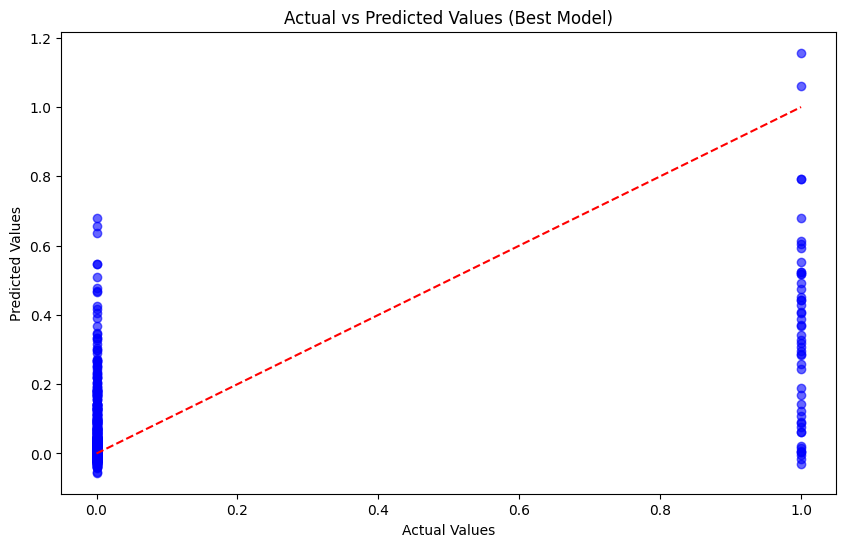

In [57]:
# Scatter Plot of Actual vs Predicted values for the best model
best_model = cb.CatBoostRegressor()  # Replace with your best model
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Values (Best Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()

on this model ridge regressor performed worse
it does overfting by giving negetve r**2 value

HOW A OVERFITTED MODEL LOOKS

In [59]:
from sklearn.linear_model import Ridge


In [60]:
# Function to evaluate a model
def evaluate_model(model, x_train, y_train, X_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


# Initialize the models
models = {"Ridge Regression": Ridge()
}

# Evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {"Mean Squared Error": mse, "R-squared": r2}

# Display the results
for name, metrics in results.items():
    print(f"{name} - Mean Squared Error: {metrics['Mean Squared Error']:.4f}, R-squared: {metrics['R-squared']:.4f}")

Ridge Regression - Mean Squared Error: 20934820255384.7305, R-squared: -581651797946062.7500


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.20497e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


<ipython-input-61-91361e274c18>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='viridis')


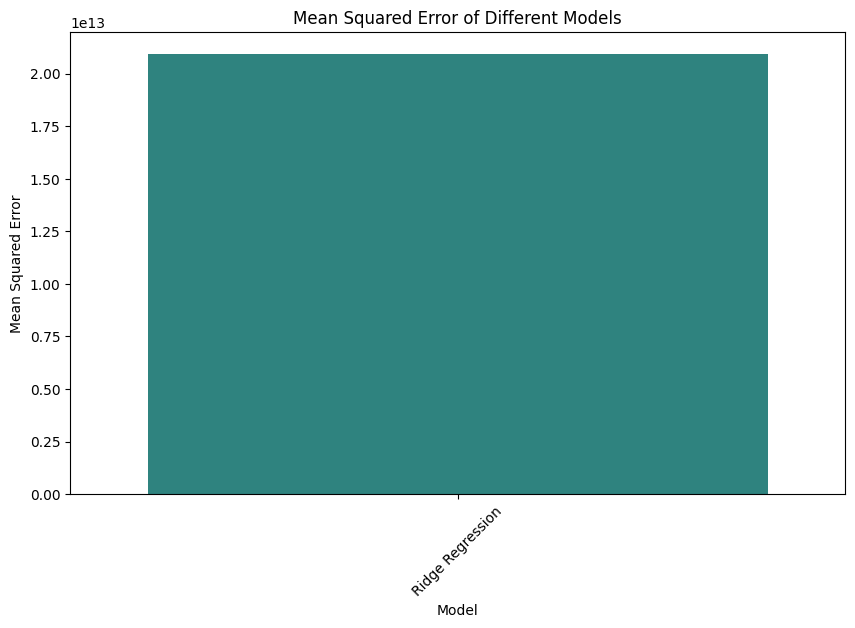

<ipython-input-61-91361e274c18>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='viridis')


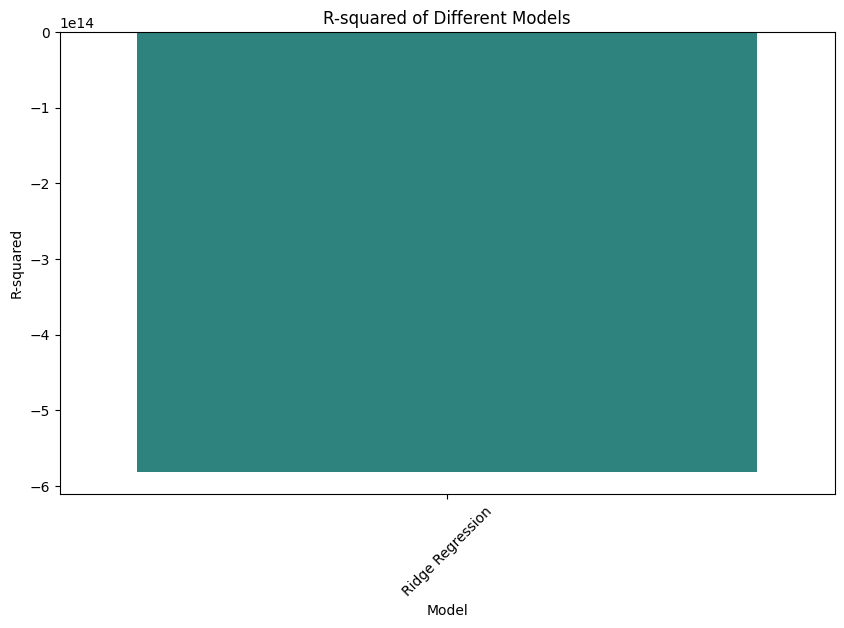

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
models = list(results.keys())
mse_values = [results[model]["Mean Squared Error"] for model in models]
r2_values = [results[model]["R-squared"] for model in models]

# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, palette='viridis')
plt.title('R-squared of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.20497e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


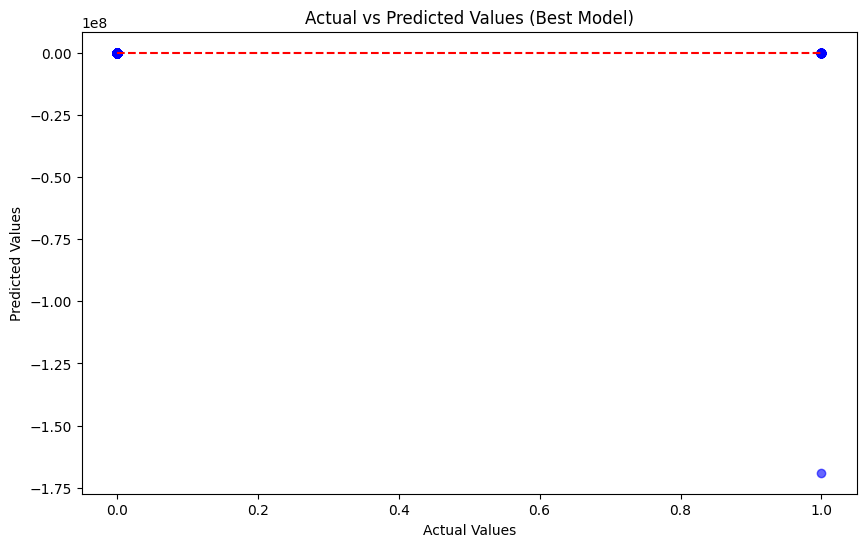

In [62]:
# Scatter Plot of Actual vs Predicted values for the best model
best_model = Ridge()  # Replace with your best model
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Values (Best Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()